In [43]:
# importing dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.preprocessing import LabelEncoder

In [4]:
# loading dataset.
df = pd.read_csv('../data/social_network_ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [9]:
# describing the statistical description.
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [10]:
# getting the datatypes.
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [11]:
# getting the information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [12]:
# determining the null values.
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [15]:
# coverting the categorical variables into numeric.
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [16]:
# preparing the data for training and testing.
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# now feature scaling.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# now fitting in the model.
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [21]:
# predicting the vlaues.
y_pred = classifier.predict(X_test)
print(f'Actual Value: {y_test[0]}, Predicted Value: {y_pred[0]}')

Actual Value: 0, Predicted Value: 0


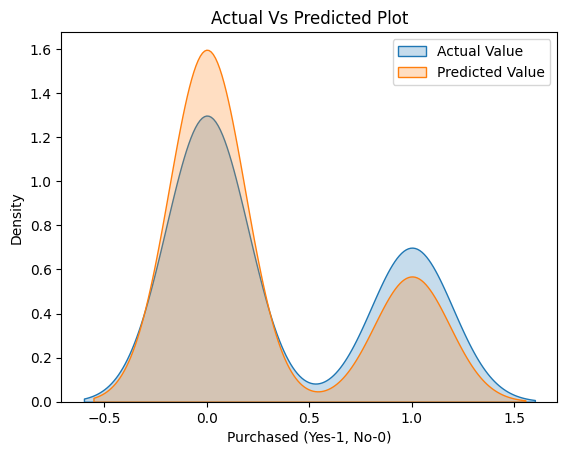

In [26]:
# displaying the kdeplot graph for the predicted and actual values.
sns.kdeplot(data=y_test, label='Actual Value', fill=True)
sns.kdeplot(data=y_pred, label='Predicted Value', fill=True)
plt.title('Actual Vs Predicted Plot')
plt.xlabel('Purchased (Yes-1, No-0)')
plt.legend()
plt.show()

In [27]:
# calculating the accuracy.
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8625

[[50  2]
 [ 9 19]]


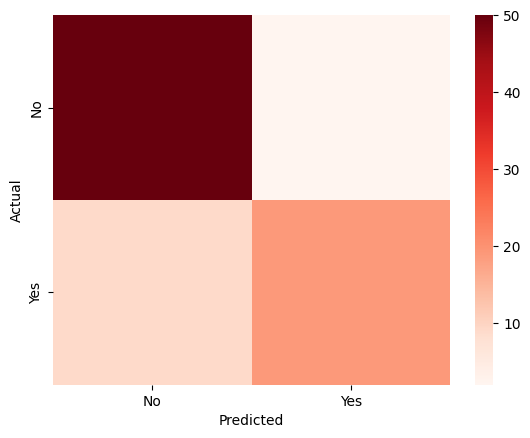

In [36]:
# ploting the confusion matrix in the headmap.
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(data=cm, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [44]:
# now describing the metrics.
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Error Rate: {1 - accuracy}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')

Recall: 0.6785714285714286
Error Rate: 0.13749999999999996
Precision: 0.9047619047619048
F1 Score: 0.7755102040816326


In [ ]:
# formulas for metrics (optional but need to know)
accuracy_1 = (tp + tn) / (tp + tn + fp + fn)
error_rate = 1 - accuracy_1
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision_1 * recall) / (precision_1 + recall)